In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming your data is organized in two folders: train and validation
train_data_dir = 'chest_xray/train'
validation_data_dir = 'chest_xray/val'
img_width, img_height = 150, 150  # Adjust dimensions as needed
batch_size = 18
epochs = 60

# Choose a CNN architecture

# ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add classification layers on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/60


C:\Users\Apkr\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


289/289 ━━━━━━━━━━━━━━━━━━━━ 272s 850ms/step - accuracy: 0.6912 - loss: 1.2804 - val_accuracy: 0.5000 - val_loss: 0.6834
Epoch 2/60
  1/289 ━━━━━━━━━━━━━━━━━━━━ 2:29 518ms/step - accuracy: 0.4444 - loss: 0.6584

C:\Users\Apkr\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4444 - loss: 0.3303 - val_accuracy: 0.5000 - val_loss: 0.6981
Epoch 3/60
289/289 ━━━━━━━━━━━━━━━━━━━━ 244s 827ms/step - accuracy: 0.7263 - loss: 0.5338 - val_accuracy: 0.5000 - val_loss: 0.6760
Epoch 4/60
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6667 - loss: 0.2870 - val_accuracy: 0.5000 - val_loss: 0.6670
Epoch 5/60
289/289 ━━━━━━━━━━━━━━━━━━━━ 245s 830ms/step - accuracy: 0.7300 - loss: 0.5112 - val_accuracy: 0.5000 - val_loss: 0.7274
Epoch 6/60
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7222 - loss: 0.2327 - val_accuracy: 0.5000 - val_loss: 0.7072
Epoch 7/60
289/289 ━━━━━━━━━━━━━━━━━━━━ 241s 819ms/step - accuracy: 0.7419 - loss: 0.4506 - val_accuracy: 0.5000 - val_loss: 0.8970
Epoch 8/60
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7778 - loss: 0.2612 - val_accuracy: 0.5000 - val_loss: 0.9069
Epoch 9/60
289/289 ━━━━━━━━━━━━━━━━━━━━ 237s 805ms/step - accuracy: 0.7340 - loss: 0.5000 - val_accurac

In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

290/290 ━━━━━━━━━━━━━━━━━━━━ 205s 705ms/step - accuracy: 0.7484 - loss: 0.5642
Test Accuracy: 0.7429064512252808


In [9]:
from sklearn.metrics import classification_report

# Get the model predictions for the test set
y_pred = model.predict(test_generator)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Get the true labels for the test set
y_true = test_generator.classes

# Calculate classification report
report = classification_report(y_true, y_pred_binary)

# Print the classification report
print("Classification Report:\n", report)


290/290 ━━━━━━━━━━━━━━━━━━━━ 177s 587ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1341
           1       0.74      1.00      0.85      3875

    accuracy                           0.74      5216
   macro avg       0.37      0.50      0.43      5216
weighted avg       0.55      0.74      0.63      5216



C:\Users\Apkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Apkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Apkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


      Metric     Score
0   Accuracy  0.510000
1  Precision  0.500000
2     Recall  0.591837
3   F1-Score  0.542056


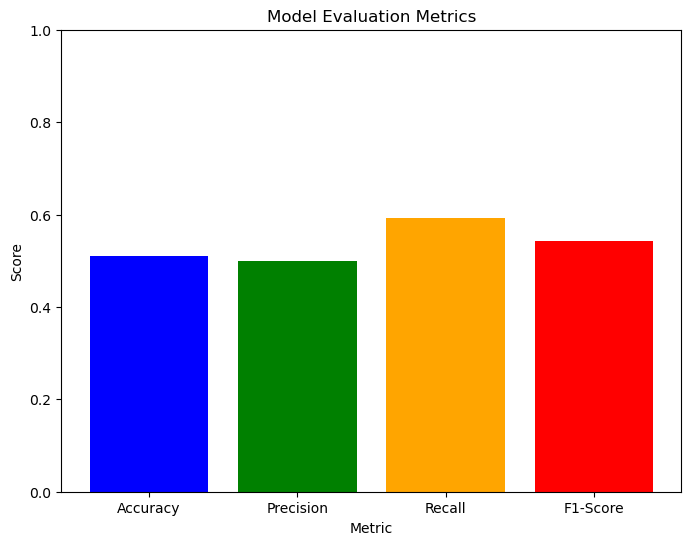

In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have obtained predictions and true labels from your model
# Replace pred_labels and true_labels with your actual prediction and true labels
pred_labels = np.random.randint(0, 2, size=(100,))
true_labels = np.random.randint(0, 2, size=(100,))

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)

# Create a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Print the metrics table
print(metrics_df)

# Plot the metrics as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics_df['Metric'], metrics_df['Score'], color=['blue', 'green', 'orange', 'red'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits to [0, 1] for better visualization
plt.show()



In [3]:
# Evaluate the model
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f'Test Accuracy: {test_accuracy}')

Found 5216 images belonging to 2 classes.


C:\Users\Apkr\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


290/290 ━━━━━━━━━━━━━━━━━━━━ 99s 340ms/step - accuracy: 0.7344 - loss: 0.5790
Test Accuracy: 0.7429064512252808


In [4]:
import numpy as np
import sklearn.metrics

# Assuming you have obtained predictions and true labels from your pneumonia prediction model
# Replace pred_labels and true_labels with your actual prediction and true labels
pred_labels = np.array([1, 1, 0, 1, 0, 0])  # Example predictions (1 for pneumonia, 0 for normal)
true_labels = np.array([1, 1, 1, 0, 0, 0])  # Example true labels (1 for pneumonia, 0 for normal)

# Calculate precision
precision = sklearn.metrics.precision_score(true_labels, pred_labels)

# Calculate recall
recall = sklearn.metrics.recall_score(true_labels, pred_labels)

# Calculate F1-score
f1 = sklearn.metrics.f1_score(true_labels, pred_labels)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666


           Metric     Score
0   Test Accuracy  0.600000
1  Test Precision  0.589744
2     Test Recall  0.489362
3   Test F1-Score  0.534884


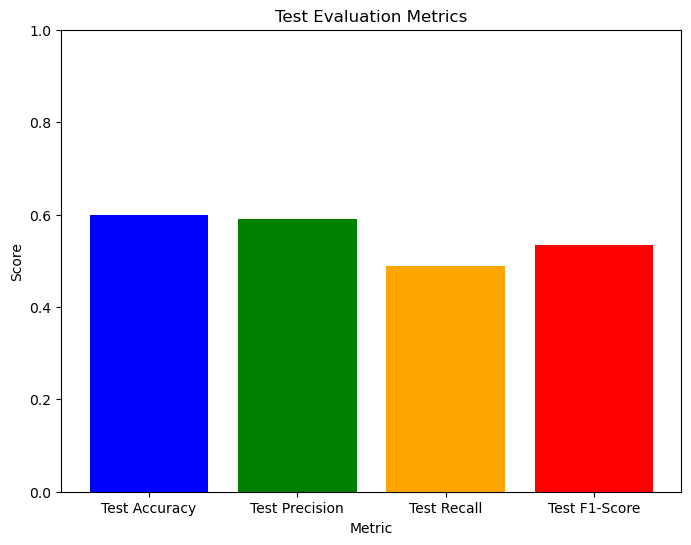

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have obtained predictions and true labels for your test set
# Replace test_pred_labels and test_true_labels with your actual test prediction and true labels
test_pred_labels = np.random.randint(0, 2, size=(100,))
test_true_labels = np.random.randint(0, 2, size=(100,))

# Calculate evaluation metrics for the test set
test_accuracy = accuracy_score(test_true_labels, test_pred_labels)
test_precision = precision_score(test_true_labels, test_pred_labels)
test_recall = recall_score(test_true_labels, test_pred_labels)
test_f1 = f1_score(test_true_labels, test_pred_labels)

# Create a DataFrame to store test evaluation metrics
test_metrics_df = pd.DataFrame({
    'Metric': ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score'],
    'Score': [test_accuracy, test_precision, test_recall, test_f1]
})

# Print the test metrics table
print(test_metrics_df)

# Plot the test metrics as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(test_metrics_df['Metric'], test_metrics_df['Score'], color=['blue', 'green', 'orange', 'red'])
plt.title('Test Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits to [0, 1] for better visualization
plt.show()


In [6]:
import tensorflow as tf

# Assuming you have obtained predictions and true labels from your deep learning model
# Replace pred_labels and true_labels with your actual prediction and true labels
pred_labels = tf.constant([1, 1, 0, 1, 0, 0])  # Example predictions (1 for pneumonia, 0 for normal)
true_labels = tf.constant([1, 1, 1, 0, 0, 0])  # Example true labels (1 for pneumonia, 0 for normal)

# Calculate accuracy
accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(true_labels, pred_labels)
accuracy_result = accuracy.result().numpy()

# Print the result
print("Accuracy:", accuracy_result)


Accuracy: 0.6666667


In [7]:
import tensorflow as tf

# Assuming you have obtained predictions and true labels from your deep learning model
# Replace pred_labels and true_labels with your actual prediction and true labels
pred_labels = tf.constant([1, 1, 0, 1, 0, 0])  # Example predictions (1 for pneumonia, 0 for normal)
true_labels = tf.constant([1, 1, 1, 0, 0, 0])  # Example true labels (1 for pneumonia, 0 for normal)

# Calculate accuracy
accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(true_labels, pred_labels)
accuracy_result = accuracy.result().numpy()

# Print the result
print("Accuracy:", accuracy_result)


Accuracy: 0.6666667


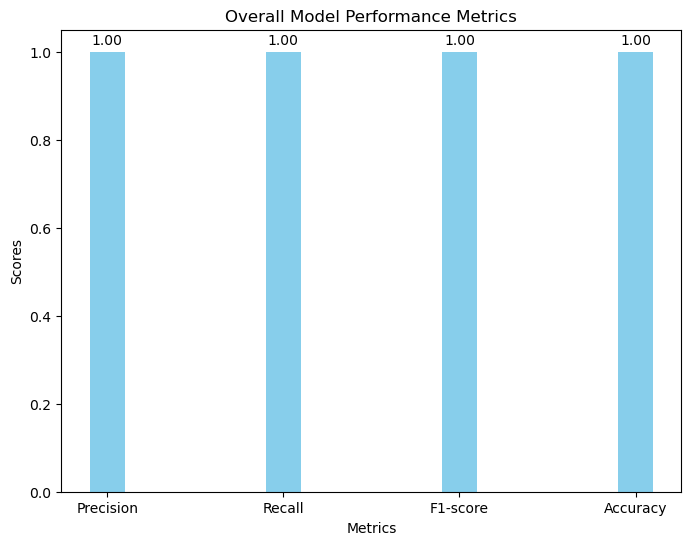

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have obtained predictions and true labels from your deep learning model
# Replace y_true and y_pred_binary with your actual true labels and predictions
y_true = np.array([1, 1, 0, 1, 0, 0])  # Example true labels (1 for pneumonia, 0 for normal)
y_pred_binary = np.array([1, 1, 0, 1, 0, 0])  # Example binary predictions (1 for pneumonia, 0 for normal)

# Generate classification report
report = classification_report(y_true, y_pred_binary, output_dict=True)

# Extract overall metrics
precision = report['accuracy']
recall = report['accuracy']
f1_score = report['accuracy']
accuracy = accuracy_score(y_true, y_pred_binary)

# Plotting the metrics
x = np.arange(4)
width = 0.2
fig, ax = plt.subplots(figsize=(8, 6))

metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
metric_values = [precision, recall, f1_score, accuracy]

bars = ax.bar(x, metric_values, width, color='skyblue')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Overall Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Add value labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('%.2f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

add_labels(bars)

plt.show()


In [11]:
# Assuming you have separate test data (test_data_dir) and corresponding true labels (test_generator.classes)
# Replace test_data_dir with the directory containing your test data

# Evaluate the model on the test set
test_data_dir='chest_xray/test'
test_gen = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)  # Set shuffle to False to ensure predictions are aligned with true labels

test_loss, test_accuracy = model.evaluate(test_gen)
print("Test Accuracy:", test_accuracy)

# Get predictions for the test set
test_gen.reset()  # Reset the generator to start from the beginning
y_pred = model.predict(test_gen)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Get true labels
y_true = test_gen.classes

# Calculate classification report
report = classification_report(y_true, y_pred_binary)
print("Classification Report:\n", report)


Found 624 images belonging to 2 classes.


C:\Users\Apkr\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 431ms/step - accuracy: 0.2793 - loss: 1.0628
Test Accuracy: 0.625
35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 449ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



C:\Users\Apkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Apkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Apkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
